Name- Saugata Ghosh,
  Roll- 302211001007

In [1]:
import pandas as pd

def generate_matrix_from_csv(file_path):
    df = pd.read_csv(file_path)
    matrix = df.to_numpy()
    return matrix

def main():
    file_path = '/As1B.csv'
    matrix = generate_matrix_from_csv(file_path)

    # Print the matrix without the first column
    print(matrix[:, 1:])

if __name__ == "__main__":
    main()

[[ 0  2  3  0  0]
 [ 2  0 15  2  0]
 [ 3 15  0  0 13]
 [ 0  2  0  0  9]
 [ 0  0 13  9  0]]


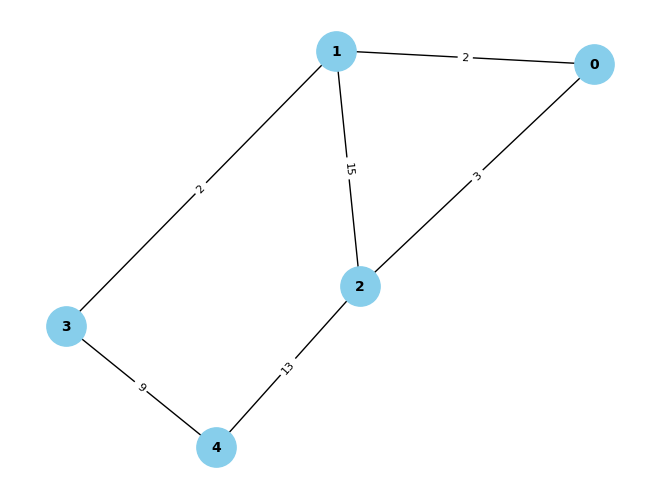

In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def read_adjacency_matrix_from_csv(file_path):
    df = pd.read_csv(file_path, index_col=0)
    return df

def create_weighted_graph_from_adjacency_matrix(adjacency_matrix):
    graph = nx.Graph()
    nodes = adjacency_matrix.index
    for source_idx, source in enumerate(nodes):
        for target_idx, target in enumerate(nodes):
            weight = adjacency_matrix.iloc[source_idx, target_idx]
            if weight != 0 and source_idx != target_idx:
                graph.add_edge(source, target, weight=weight)
    return graph

def visualize_weighted_graph(graph):
    pos = nx.spring_layout(graph)
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw(graph, pos, with_labels=True, node_size=800, node_color='skyblue', font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=8)
    plt.show()

def main():
    file_path = '/As1B.csv'
    adjacency_matrix = read_adjacency_matrix_from_csv(file_path)
    weighted_graph = create_weighted_graph_from_adjacency_matrix(adjacency_matrix)
    visualize_weighted_graph(weighted_graph)

if __name__ == "__main__":
    main()


Step 1: Reading the CSV File and Obtaining the Adjacency Matrix
To begin, we need to load the dataset from a CSV file using the Pandas library. The CSV file should represent an adjacency matrix, where the rows and columns represent nodes, and the values denote the weight of edges between the nodes. We use the pd.read_csv() function to read the file into a DataFrame.

Step 2: Creating the Weighted Graph from the Adjacency Matrix
Next, we use the NetworkX library to create the weighted graph. We initialize an empty graph object and then iterate through the rows and columns of the adjacency matrix. We extract the weights from the matrix and add edges to the graph with corresponding weights. To avoid duplicate edges, we iterate only over the upper triangular part of the matrix (excluding the diagonal).

Step 3: Visualization of the Weighted Graph
Finally, we visualize the constructed weighted graph using NetworkX and Matplotlib. The nx.spring_layout() function helps to position the nodes using the Fruchterman-Reingold force-directed algorithm. We draw the graph using nx.draw() and display node labels. Additionally, we add edge labels using nx.draw_networkx_edge_labels() to represent the edge weights.